In [52]:
import numpy as np
from utils import ZeroDFullydynamic,ZeroDQuasidynamic,advance,solve
import matplotlib.pyplot as plt


In [53]:
Tmax=300
cs=3000
vpl=1e-5
G=2e9
sigma=5e6
a=0.01
b=0.015
drs=1e-5
v0=1.01*vpl
theta0=drs/vpl
u0=np.array([v0,theta0])
dt_const=1e-6

problem=ZeroDQuasidynamic(Tmax,u0,a,b,sigma,drs,G,cs,vpl)

In [54]:
print(b*sigma/(G)/drs)

3.7499999999999996


In [55]:
t=0
u=u0.reshape(1,2)
i=1
T=np.array([0]).reshape(1,1)
while T[-1]<Tmax:
    dt=dt_const/u[-1,0]
    T=np.append(T,(T[-1,0]+dt).reshape(1,1),axis=0)
    u_new=advance(dt,u[-1,:],problem.RHS)
    u=np.append(u,u_new,axis=0)

In [56]:
T[-1]

array([302.92897438])

In [57]:
u.shape

(3538, 2)

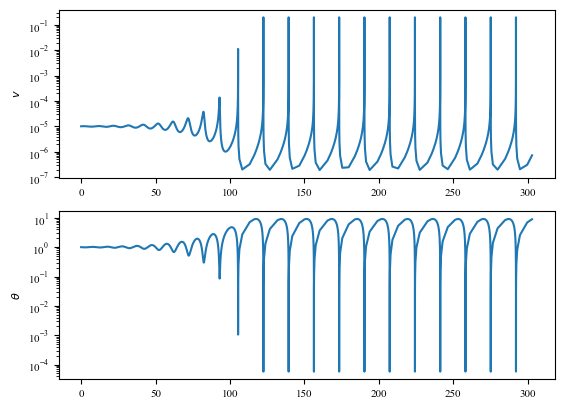

In [58]:
fig, (ax1,ax2)=plt.subplots(2,1)
ax1.plot(T,u[:,0])
ax1.set_ylabel(r'$v$')
ax1.set_yscale('log')
ax2.plot(T,u[:,1])
ax2.set_ylabel(r'$\theta$')
ax2.set_yscale('log')



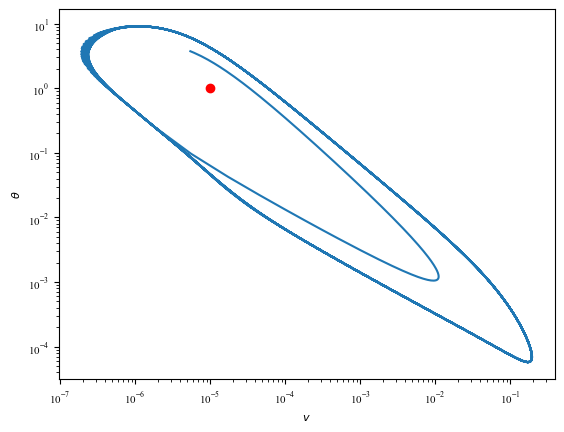

In [60]:
fig, (ax1)=plt.subplots(1,1)
ax1.plot(u[1000:,0],u[1000:,1])
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$v$')
ax1.set_ylabel(r'$\theta$')
v_points=np.logspace(-7,0,100)
theta=drs/v_points
# 3plt.plot(v_points,theta)
plt.plot(vpl,drs/vpl,'ro')

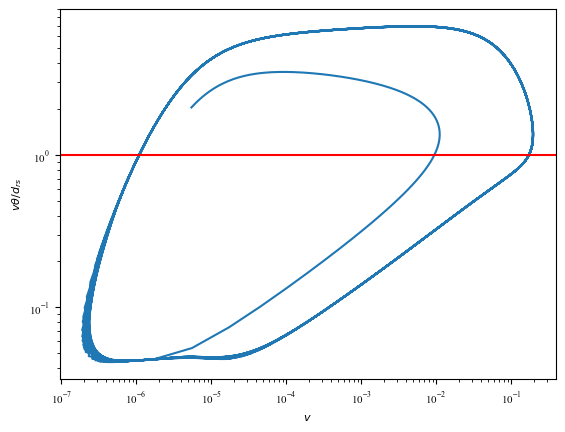

In [61]:
fig, (ax1)=plt.subplots(1,1)

ax1.plot(u[1000:,0],u[1000:,1]*u[1000:,0]/drs)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$v$')
ax1.set_ylabel(r'$v\theta/d_{rs}$')
ax1.axhline(1,color='r')    

(150.0, 190.0)

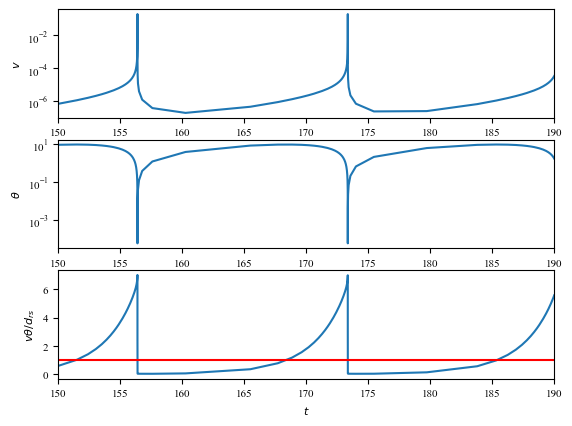

In [62]:
fig, (ax1,ax2,ax3)=plt.subplots(3,1)
ax1.plot(T,u[:,0])
ax1.set_ylabel(r'$v$')
ax1.set_yscale('log')
ax2.plot(T,u[:,1])
ax2.set_ylabel(r'$\theta$')
ax2.set_yscale('log')
ax3.plot(T,u[:,0]*u[:,1]/drs)
ax3.axhline(y=1, color='r', linestyle='-')
ax3.set_xlabel(r'$t$')
ax3.set_ylabel(r'$v\theta/d_{rs}$')
ax1.set_xlim([150,190])
ax2.set_xlim([150,190])
ax3.set_xlim([150,190])


# Running the system with different initial conditions in terms of $v\theta/drs$


In [63]:
# # Specefying a fixed value for v0
# v0=1.01*vpl
# # Then we want to test different ratios of vtheta/drs
# # defining two different figures
# fig, (ax1,ax2)=plt.subplots(1,2)
# N=20
# # specifying N differnet colors:
# colors=plt.cm.viridis(np.linspace(0,1,N))
# coeff=np.logspace(-3,2,3)
# Tmax=100
# for index in range(len(coeff)):
#     theta0=coeff[index]*drs/v0
#     u0=np.array([v0,theta0])
#     problem=ZeroDQuasidynamic(Tmax,u0,a,b,sigma,drs,G,cs,vpl)
#     T=np.array([0]).reshape(1,1)
#     u=u0.reshape(1,2)
#     while T[-1]<Tmax:
#         dt=dt_const/u[-1,0]
#         T=np.append(T,(T[-1,0]+dt).reshape(1,1),axis=0)
#         u_new=advance(dt,u[-1,:],problem.RHS)
#         u=np.append(u,u_new,axis=0)
        
        
#     ax1.plot(u[1000:,0],u[1000:,1],color=colors[index])
#     ax2.plot(u[1000:,0],u[1000:,1]*u[1000:,0]/drs,color=colors[index])

# ax1.set_xscale('log')
# ax1.set_yscale('log')
# ax1.set_xlabel(r'$v$')
# ax1.set_ylabel(r'$\theta$')
# v_points=np.logspace(-7,0,100)
# theta=drs/v_points
# ax1.plot(v_points,theta,'black')
# ax1.plot(vpl,drs/vpl,'ro')
# ax2.set_xscale('log')
# ax2.set_yscale('log')
# ax2.set_xlabel(r'$v$')
# ax2.set_ylabel(r'$v\theta/d_{rs}$')
# ax2.axhline(1,color='black')
# plt.tight_layout()


# plotting vector field

In [67]:
minv=-20
maxv=20
mintheta=-20
maxtheta=20
vgrid=np.logspace(minv,maxv,10)
thetagrid=np.logspace(mintheta,maxtheta,10)
X1, X2 = np.meshgrid(vgrid, thetagrid)
U = np.zeros(X1.shape)
V = np.zeros(X2.shape)

<Figure size 800x600 with 0 Axes>

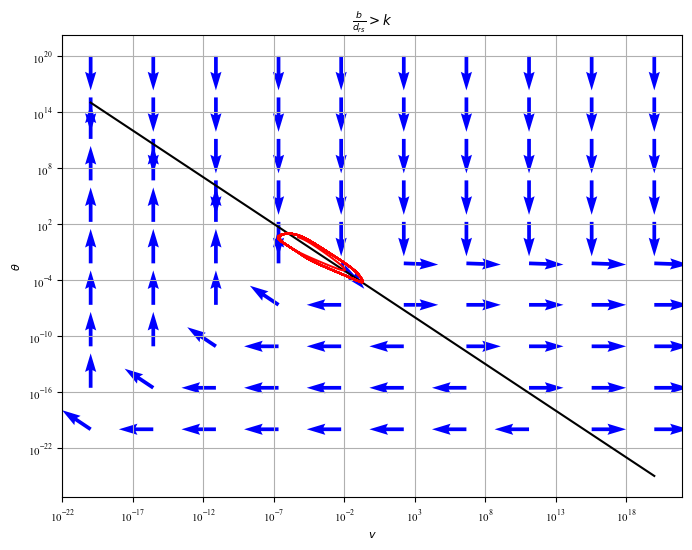

In [68]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman']})
plt.rcParams.update({'font.family': 'serif', 'font.serif': 'Times New Roman','font.size': 8})
# specifying figure size
plt.figure(figsize=(8, 6))
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        u0 = np.array([X1[i, j], X2[i, j]])
        f = problem.RHS(u0)
        U[i, j] = f[0]
        V[i, j] = f[1]
        N = np.sqrt(U[i,j]**2 + V[i,j]**2)
        U[i,j] = U[i,j] / N
        V[i,j] = V[i,j] / N


plt.figure(figsize=(8, 6))
plt.quiver(X1, X2, U, V, color='blue')
plt.xlabel('$v$')
plt.ylabel(r'$\theta$')
plt.title(r'$\frac{b}{d_{rs}}>k$')
plt.xscale('log')
plt.yscale('log')
v_points=np.logspace(minv,maxv,100)
theta=drs/v_points
plt.plot(v_points,theta,'black')
plt.grid()
#plt.plot(vpl,drs/vpl,'ro')
plt.plot(u[1000:,0],u[1000:,1],color='red')
# saving the figure with the condition as string
# plt.savefig('bdrs>k.png', dpi=300, bbox_inches='tight')